<a href="https://colab.research.google.com/github/machinelearnerme/BigDataAndAI/blob/main/AI_assignment_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix

Load MNIST Dataset

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Building Model

In [38]:
def build_model(activation_function):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    model.add(Dense(128, activation=activation_function))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation=activation_function))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation=activation_function))
    model.add(Dropout(0.3))

    model.add(Dense(64, activation=activation_function))
    model.add(Dense(64, activation=activation_function))
    model.add(Dense(32, activation=activation_function))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

Early stopping

In [39]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


Model Training

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


------------------------------------------
Activation Function: sigmoid
------------------------------------------
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1632 - loss: 2.1919 - val_accuracy: 0.4127 - val_loss: 1.4034
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4693 - loss: 1.2956 - val_accuracy: 0.6652 - val_loss: 0.9013
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6769 - loss: 0.9023 - val_accuracy: 0.8373 - val_loss: 0.5447
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8076 - loss: 0.6184 - val_accuracy: 0.8912 - val_loss: 0.3939
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8639 - loss: 0.4810 - val_accuracy: 0.9303 - val_loss: 0.2985
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8945 - loss: 0.4018 - val_accuracy: 0.9428 - val_loss: 0.2412
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9116 - loss: 0.3432 - val_accuracy: 0.9502 - val

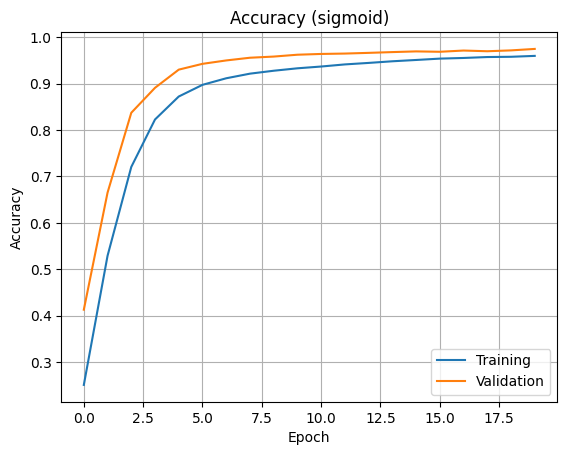

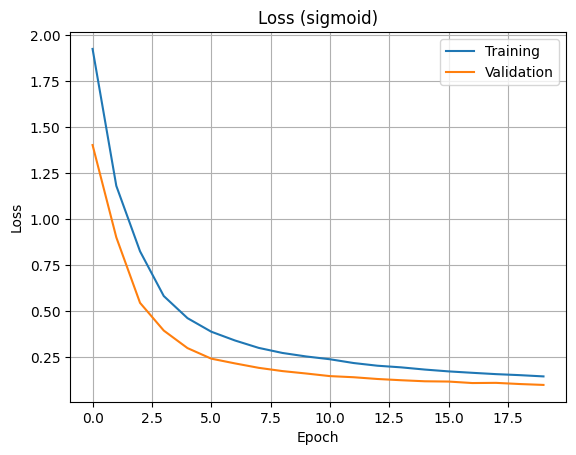

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


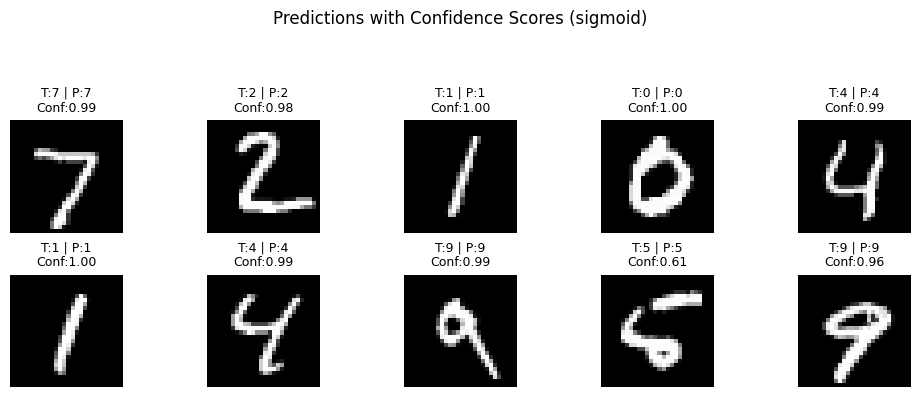

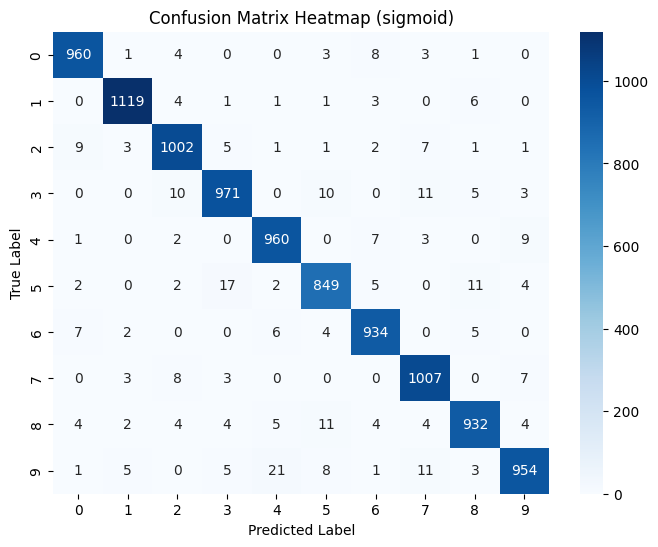

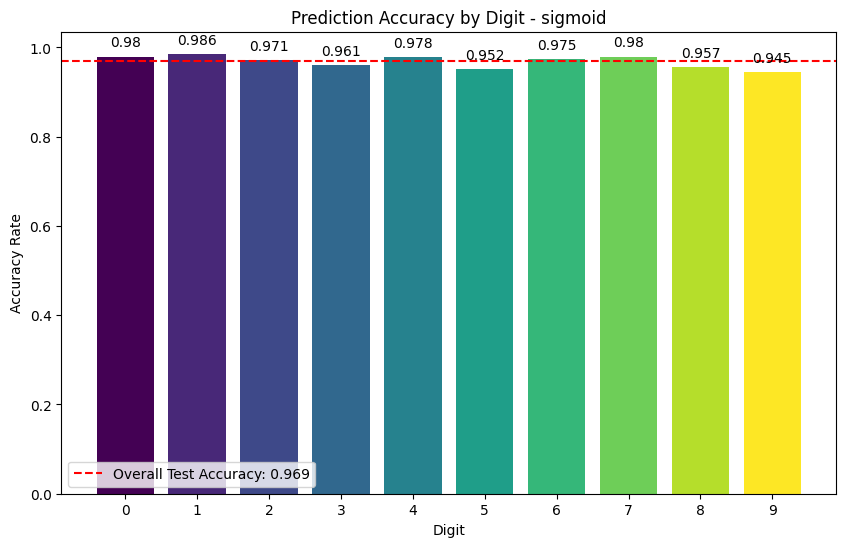

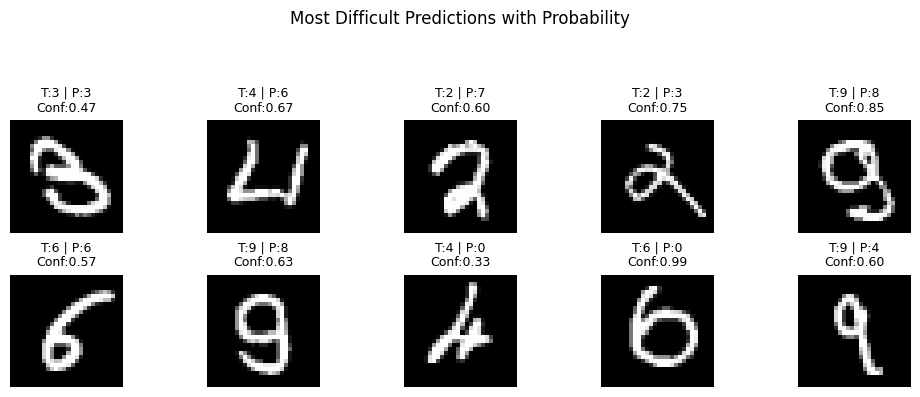

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


------------------------------------------
Activation Function: tanh
------------------------------------------
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7643 - loss: 0.8005 - val_accuracy: 0.9347 - val_loss: 0.2234
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9083 - loss: 0.3127 - val_accuracy: 0.9450 - val_loss: 0.1808
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9233 - loss: 0.2572 - val_accuracy: 0.9583 - val_loss: 0.1505
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9341 - loss: 0.2223 - val_accuracy: 0.9620 - val_loss: 0.1363
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9383 - loss: 0.2088 - val_accuracy: 0.9638 - val_loss: 0.1222
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9442 - loss: 0.1912 - val_accuracy: 0.9665 - val_loss: 0.1197
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9467 - loss: 0.1778 - val_accuracy: 0.9685 - val_

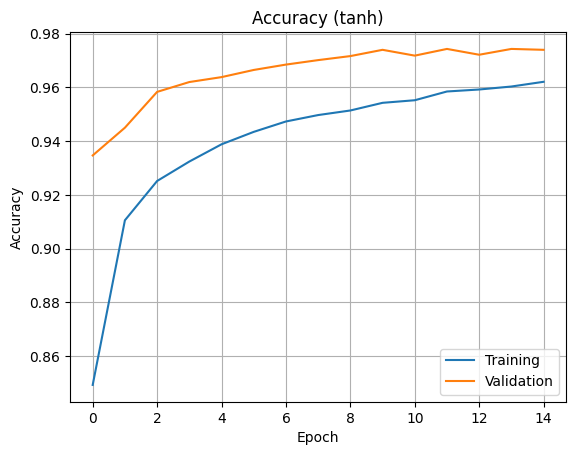

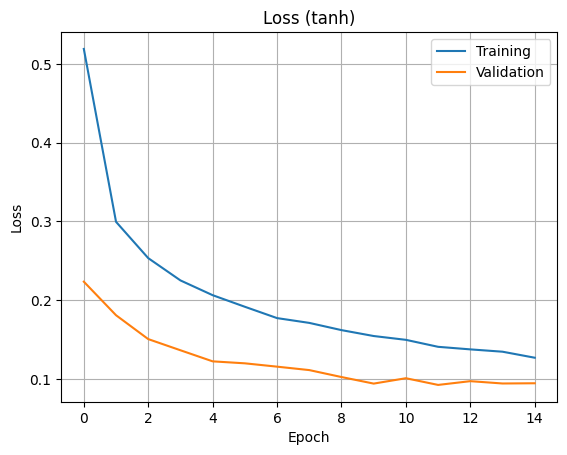

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


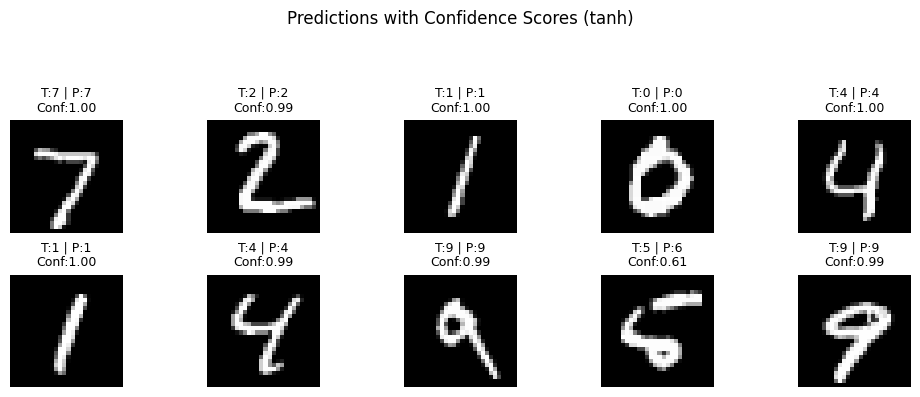

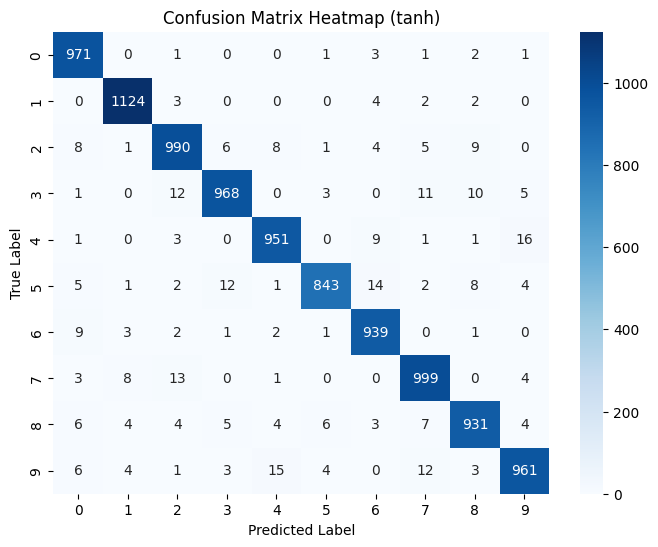

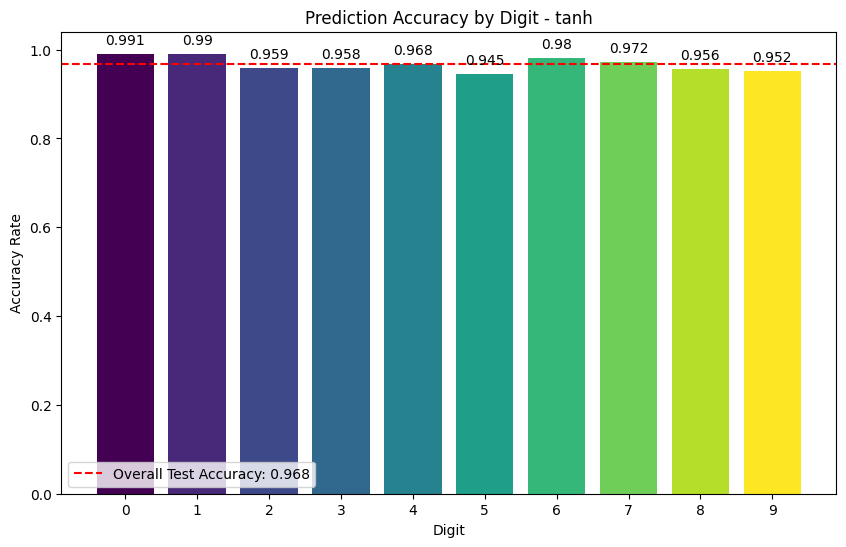

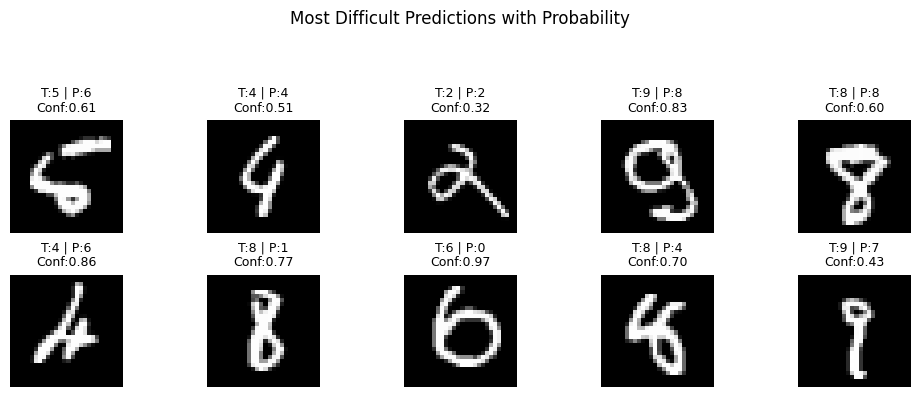

In [42]:
for activation_function in ['sigmoid','tanh']:
  model = build_model(activation_function)
  print("------------------------------------------")
  print(f"Activation Function: {activation_function}")
  print("------------------------------------------")
  history = model.fit(
    x_train,
    y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

  # ------------------------------------------
  # Evaluate Model
  # -----------------------------------------
  test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
  print(f"Test Accuracy with {activation_function}: {test_accuracy:.4f}")

  # ------------------------------------------
  # Plot Training History
  # ------------------------------------------
  def plot_history(history, activation_func_name):
      plt.figure()
      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
      plt.title(f"Accuracy ({activation_func_name})")
      plt.xlabel("Epoch")
      plt.ylabel("Accuracy")
      plt.legend(["Training", "Validation"])
      plt.grid(True)
      plt.show()

      plt.figure()
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title(f"Loss ({activation_func_name})")
      plt.xlabel("Epoch")
      plt.ylabel("Loss")
      plt.legend(["Training", "Validation"])
      plt.grid(True)
      plt.show()

  plot_history(history, activation_function)

  # ------------------------------------------
  # Prediction and Confidence
  # ------------------------------------------
  predictions = model.predict(x_test)
  predicted_labels = np.argmax(predictions, axis=1)
  true_labels = np.argmax(y_test_cat, axis=1)
  prediction_confidence = np.max(predictions, axis=1)

  # --------------------------
  # Visualise
  # ------------------------------
  plt.figure(figsize=(10, 4))
  for i in range(10):
      plt.subplot(2, 5, i + 1)
      plt.imshow(x_test[i], cmap='gray')
      plt.title(
          f"T:{true_labels[i]} | P:{predicted_labels[i]}\nConf:{prediction_confidence[i]:.2f}",
          fontsize=9
      )
      plt.axis('off')

  plt.suptitle(f"Predictions with Confidence Scores ({activation_function})")
  plt.tight_layout(rect=[0, 0, 1, 0.90])
  plt.show()

  # ------------------------------------------
  # Confusion Matrix Heatmap
  # ------------------------------------------
  cm = confusion_matrix(true_labels, predicted_labels)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title(f"Confusion Matrix Heatmap ({activation_function})")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  # ------------------------------------------
  # Prediction Difficulty
  # ------------------------------------------
  difficulty = {}

  for digit in range(10):
     idx = np.where(y_test == digit)[0]
     correct = np.sum(predicted_labels[idx] == y_test[idx])
     difficulty[digit] =  (correct / len(idx))

  plt.figure(figsize=(10, 6))
  cmap = plt.get_cmap('viridis')
  colors = cmap(np.linspace(0, 1, len(difficulty)))
  bars = plt.bar([str(d) for d in difficulty.keys()], difficulty.values(), color=colors)


  plt.axhline(y=test_accuracy, color='red', linestyle='--', label=f'Overall Test Accuracy: {test_accuracy:.3f}')

  plt.xlabel("Digit")
  plt.ylabel("Accuracy Rate")
  plt.title(f"Prediction Accuracy by Digit - {activation_function}")
  plt.grid(False)
  plt.legend()


  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval + 0.015, round(yval, 3), ha='center', va='bottom')

  plt.show()


  plt.figure(figsize=(10, 4))

  count = 0
  for i in range(len(y_test)):
      true_label = y_test[i]
      pred_label = predicted_labels[i]
      confidence = prediction_confidence[i]


      if (true_label != pred_label) or (confidence < 0.6):
          plt.subplot(2, 5, count + 1)
          plt.imshow(x_test[i], cmap='gray')
          plt.title(
              f"T:{true_label} | P:{pred_label}\nConf:{confidence:.2f}",
              fontsize=9
          )
          plt.axis('off')
          count += 1

      if count == 10:
          break

  plt.suptitle("Most Difficult Predictions with Probability")
  plt.tight_layout(rect=[0, 0, 1, 0.90])
  plt.show()



